In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
def create_embedding_scatterplot(df, class1, class2):
    """
    Creates a scatterplot of the 2D embeddings for the two selected classes.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing columns 'x_2d', 'y_2d', and 'category'
        class1 (str or int): The first class label.
        class2 (str or int): The second class label.
        
    Returns:
        fig (plotly.graph_objs._figure.Figure): A Plotly scatterplot figure.
    """
    
    classes = sorted(df['category'].unique())

    # Validate that the supplied classes are in the DataFrame
    if class1 not in classes or class2 not in classes:
        raise ValueError(f"Invalid class selection. Available options are: {classes}")
    
    # Define colors to use for each class
    colors = ['orange', 'blue']

    # filter df for the selected classes
    filtered_df = df[df['category'].isin([class1, class2])]

    # create scatterplot using Plotly Express
    fig = px.scatter(
        filtered_df,
        x='x_2d',
        y='y_2d',
        color='category',
        color_discrete_sequence=colors,
        title=f"Scatterplot of classes {class1} and {class2}",
        labels={'x_2d': 'X', 'y_2d': 'Y'},
        height=600,
        width=900,
        template="ggplot2"
    )

    return fig

### Data Import

In [7]:
df = pd.read_pickle('./../data/processed/train_with_embeddings.pkl')

df_overlap = pd.read_csv('./../data/processed/df_overlap.csv', index_col=0)
df_overlap = df_overlap.astype(float)

In [8]:
df_overlap.head()

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,NaN,0.009499,0.003026,0.000998,0.002720,0.008735,0.014343,0.087514,0.052432,0.002376,0.000302,0.188272,0.025248,0.142451,0.071542,0.681024,0.530566,0.631426,0.405994,0.780711
comp.graphics,NaN,NaN,0.758200,0.827906,0.832623,0.586995,0.363519,0.084485,0.075652,0.006135,0.011652,0.073598,0.729393,0.206431,0.186172,0.059276,0.024649,0.027679,0.027303,0.035288
comp.os.ms-windows.misc,NaN,NaN,NaN,0.793333,0.755274,0.738008,0.301950,0.043660,0.038589,0.002044,0.008246,0.078903,0.638372,0.110876,0.107298,0.028132,0.009065,0.008080,0.009421,0.018003
comp.sys.ibm.pc.hardware,NaN,NaN,NaN,NaN,0.842571,0.639562,0.350449,0.038119,0.032079,0.003082,0.007702,0.049068,0.613764,0.105162,0.098363,0.024605,0.009145,0.010062,0.009313,0.011341
comp.sys.mac.hardware,NaN,NaN,NaN,NaN,NaN,0.543305,0.393937,0.052412,0.046100,0.003326,0.009649,0.036186,0.629677,0.123557,0.120700,0.023265,0.011829,0.010965,0.012233,0.010648


### Visualizations

##### Coefficient Overlap Matrix

Using seaborn

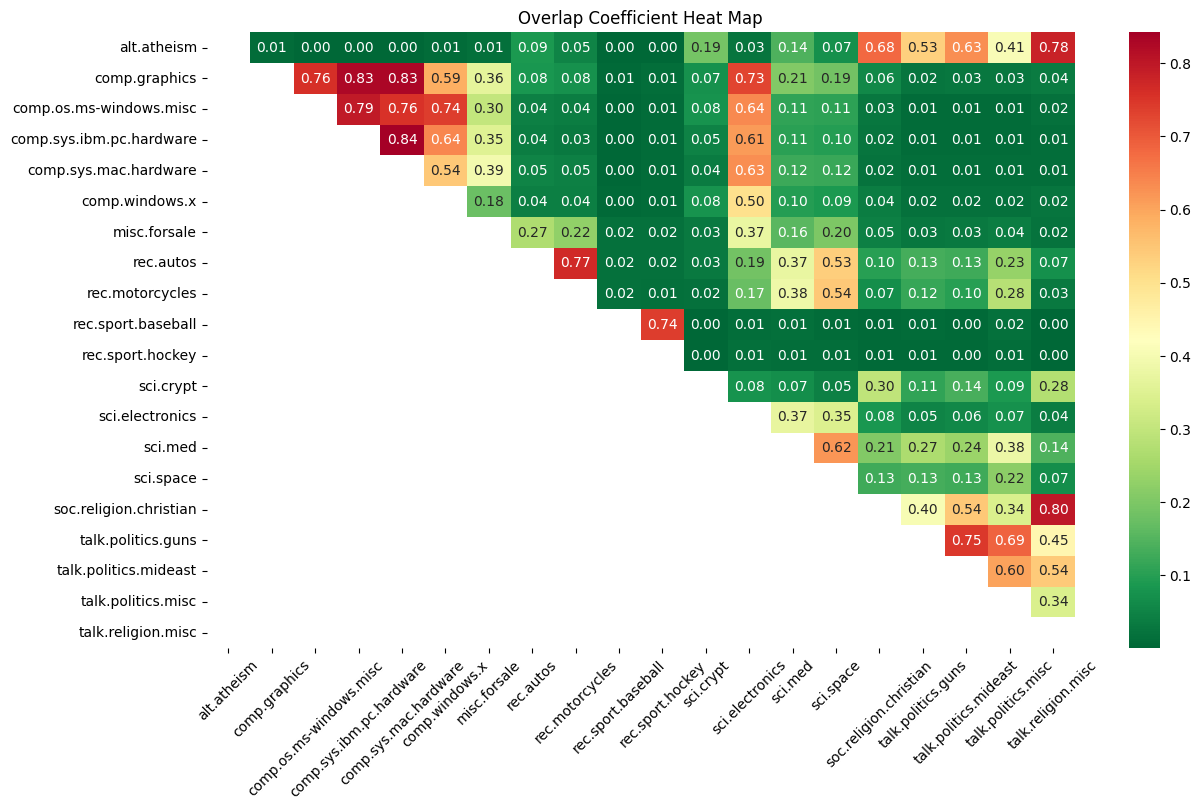

In [13]:
plt.figure(figsize=(14, 8))

ax = sns.heatmap(df_overlap, annot=True, fmt=".2f", cmap="RdYlGn_r", cbar=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title("Overlap Coefficient Heat Map")
plt.show()

Using Plotly Express

In [14]:
fig = px.imshow(df_overlap,
                text_auto='.2f',
                color_continuous_scale='RdYlGn_r',
                aspect='auto',
                title="Overlap Coefficient Heat Map",
                height=800,
                width=1000,
                template="ggplot2"
                )

fig.update_xaxes(tickangle=45)

fig.show()

##### Embeddings

Two similar topics

In [15]:
create_embedding_scatterplot(df=df, class1='comp.sys.ibm.pc.hardware', class2='comp.sys.mac.hardware')

Two different topics

In [16]:
create_embedding_scatterplot(df=df, class1='sci.space', class2='rec.sport.baseball')